In [ ]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.layers import LSTM, Dense, Dropout
from Keras.Models import Sequential
from Keras.Layers import Dense
import Keras.Backend as K
from Keras.Callbacks import EarlyStopping
from Keras.Optimisers import Adam
from Keras.Models import load_model
from Keras.Layers import LSTM
from Keras.utils.vis_utils import plot_model

: 

In [2]:
df=pd.read_csv("STOCKS/COALINDIA.csv")

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


In [5]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2593,2021-04-26,COALINDIA,EQ,126.15,127.75,128.00,126.50,127.00,126.95,127.30,4967884,6.324104e+13,29393.0,1755583,0.3534
2594,2021-04-27,COALINDIA,EQ,126.95,127.00,127.90,126.60,127.55,127.50,127.47,3982954,5.077023e+13,28486.0,1521312,0.3820
2595,2021-04-28,COALINDIA,EQ,127.50,128.00,129.45,127.50,128.50,128.50,128.67,6206074,7.985049e+13,32352.0,1981995,0.3194
2596,2021-04-29,COALINDIA,EQ,128.50,129.75,130.05,127.65,127.95,128.05,128.46,8345584,1.072040e+14,37445.0,3185650,0.3817
2597,2021-04-30,COALINDIA,EQ,128.05,127.40,134.60,127.00,133.00,133.05,132.61,27396950,3.633107e+14,103147.0,6859319,0.2504


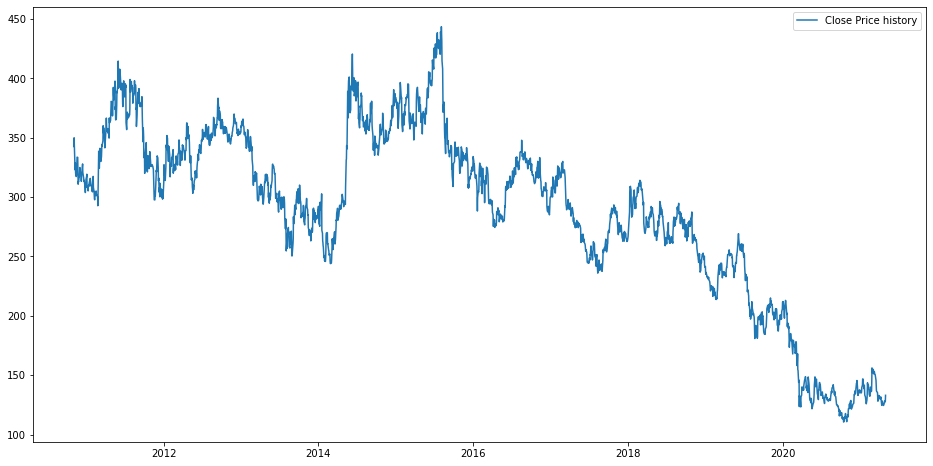

In [6]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
#plt.plot(df['High'], label='high')
plt.plot(df['Close'], label='Close Price history')
plt.legend()

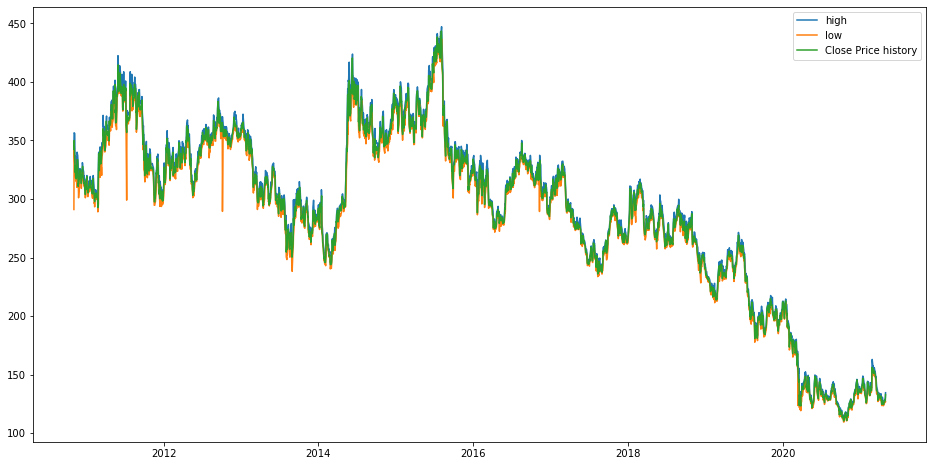

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df['High'], label='high')
plt.plot(df['Low'], label='low')
plt.plot(df['Close'], label='Close Price history')
plt.legend()

In [14]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

NameError: name 'valid' is not defined

In [10]:
#Set Target Variable
output_var = pd.DataFrame(df['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [11]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2010-11-04,0.539129,0.694606,0.554130,1.000000
2010-11-05,0.694748,0.729269,0.712933,0.066513
2010-11-08,0.721083,0.727476,0.671706,0.097794
2010-11-09,0.656292,0.660242,0.657963,0.049449
2010-11-10,0.642077,0.643508,0.642846,0.043852


In [15]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
X_train

,Open,High,Low,Volume
Date,,,,
2010-11-04,0.539129,0.694606,0.554130,1.000000
2010-11-05,0.694748,0.729269,0.712933,0.066513
2010-11-08,0.721083,0.727476,0.671706,0.097794
2010-11-09,0.656292,0.660242,0.657963,0.049449
2010-11-10,0.642077,0.643508,0.642846,0.043852
...,...,...,...,...
2020-05-15,0.056412,0.054983,0.055581,0.013082
2020-05-18,0.048332,0.043478,0.035120,0.050684
2020-05-19,0.036660,0.034962,0.037410,0.019839


In [17]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[-1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[-1])

In [32]:
#Building the LSTM Model
lstm = sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

NameError: name 'sequential' is not defined

In [22]:
#Linear regression

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [33]:
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

KeyError: 'Dayofweek'

In [29]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [26]:
#KNN

#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [28]:
#scaling data
X_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(x_train_scaled)
X_valid_scaled = scaler.fit_transform(x_valid)
X_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

NameError: name 'x_train' is not defined